In [0]:
# set up
# 
# install VS Code => https://code.visualstudio.com/Download
# install anaconda => https://www.anaconda.com/distribution/#download-section
# install git => https://git-scm.com/downloads
# 
# CREATE A PYTHON ENVIROMENT
# run this command: (works as at 4/4/2020)
# $ conda create --name imageproc python=3.8.1 numpy pandas scipy opencv
# $ conda activate imageproc
# $ conda install -c conda-forge opencv
# 
# CLONE THE REPOSIORY
# run this command: (works as at 4/4/2020)
# $ git clone ....
# 
# OPEN FOLDER IN VS CODE
# $ cd ...; code .


In [3]:
# IMPORTANT:
# The proper way to open this project
# 1. Open Visual Studio Code
# 2. File -> Open Folder -> Choose the folder of the project

# To confirm that all is okay, the path of the project should be displayed below
# when you run this cell. If it shows the temp folder, do it again
import os
print(os.getcwd())

c:\Users\saheed\Documents\ImageProcCourse\__FACE


## QUICK Python Refresher

### Basics

In [4]:
import numpy as np

In [5]:
lst = [9,8,7]
lst

[9, 8, 7]

In [6]:
arr = np.array([2,3,4])
arr

array([2, 3, 4])

In [7]:
np_arr = np.asarray(lst)
np_arr

array([9, 8, 7])

In [8]:
np_arr == lst

array([ True,  True,  True])

In [9]:
type(np_arr)

numpy.ndarray

In [10]:
type(lst)

list

In [11]:
arr_added_row = np.concatenate((np_arr, arr),axis=0)
arr_added_row

array([9, 8, 7, 2, 3, 4])

In [12]:
arr_added_row = arr_added_row.reshape(2,3)
arr_added_row

array([[9, 8, 7],
       [2, 3, 4]])

In [14]:
# TODO: remove this

# arr_added_row = np.concatenate((arr_added_row, arr),axis=1)
# arr_added_row
# ERROR: arr_added_row has 2 different Dim and arr has 1
# https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/

In [15]:
# saving to a binary file 'npy' format
np.save("data/obj_np_save1", arr_added_row)

# saving to text format (e.g csv, ...)
np.savetxt("data/text_np_save1.csv", arr_added_row, delimiter=",") #default fmt='%.18e'
np.savetxt("data/text_np_save2.csv", arr_added_row, delimiter=",", fmt='%.3e')
np.savetxt("data/text_np_save3.csv", arr_added_row, delimiter=",", fmt='%10.5f')
np.savetxt("data/text_np_save4.csv", arr_added_row, delimiter=",", fmt='%s') #as string


In [16]:
# using pandas to save
import pandas as pd 
pd.DataFrame(arr_added_row).to_csv("data/pd_text_np_save.csv", header=None, index=None)

In [17]:
arr_from_npy_file = np.load("data/obj_np_save1.npy")
arr_from_npy_file

array([[9, 8, 7],
       [2, 3, 4]])

In [18]:
arr_from_csv_file = np.genfromtxt('data/pd_text_np_save.csv',delimiter=',')
arr_from_csv_file

array([[9., 8., 7.],
       [2., 3., 4.]])

In [19]:
# using pandas to read
df=pd.read_csv('data/pd_text_np_save.csv', sep=',',header=None)
df.values

array([[9, 8, 7],
       [2, 3, 4]], dtype=int64)

### Basic Image operations

In [20]:
import cv2
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [26]:

# Open Image file and display it
img_raw = cv2.imread('data/messi-ball-9.jpg')

In [27]:
type(img_raw)

numpy.ndarray

In [28]:
img_raw.shape

(331, 474, 3)

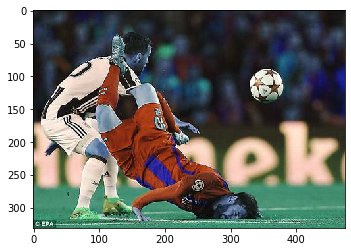

In [29]:
plt.imshow(img_raw)

Something is wrong with the output! That is not Bacelona FC's Jersey!!!

This is because OpenCV arranges the color channels as BGR while matplotlib which we used to view the image is expects a RGB order of the channels.

Let's fix that:

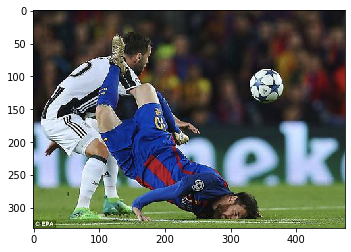

In [30]:
img_raw_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_raw_rgb)

In [31]:
# TODO: show in IDE 
# TODO: a short note on  cv2.waitKey and cv2.imshow

# https://note.nkmk.me/en/python-script-file-path/
# https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory
# https://stackoverflow.com/questions/82831/how-do-i-check-whether-a-file-exists-without-exceptions


# import cv2
# img = cv2.imread('image.jpg')
# while True:
#     cv2.imshow('mandrill',img)

#     if cv2.waitKey(1) & 0xFF == 27:
#         break


# cv2.destroyAllWindows()

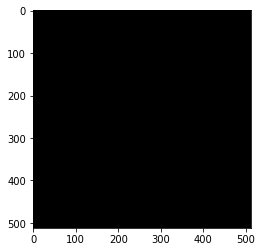

In [39]:
# Create black image
image_blank = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(image_blank)

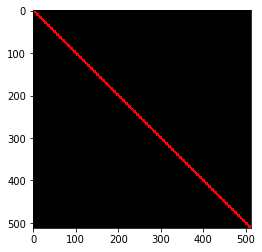

In [40]:
# Draw any shape:
# cv2.shape(line, rectangle etc)(image,Pt1,Pt2,color,thickness)

# Draw a diagonal red line with thickness of 5 px
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),5)
plt.imshow(image_blank)

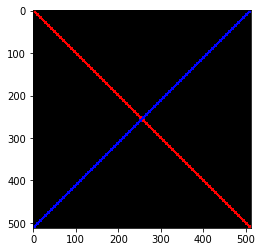

In [41]:

# line_red_blue = cv2.line(line_red,(511,0),(0,511),(0,0,255),5)

line_red_blue = cv2.line(image_blank,(511,0),(0,511),(0,0,255),5)
plt.imshow(line_red_blue)

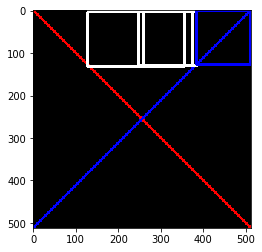

In [58]:
image_boxed = cv2.rectangle(line_red_blue,(384,0),(510,128),(0,0,255),5)
# cv2.rectangle(image_blank,(384,0),(510,128),(255,255,255),5)
# new_img = cv2.rectangle(image_blank,(128,4),(356,132),(255,255,255),5)
# plt.close()
# plt.clf()
plt.imshow(image_boxed)


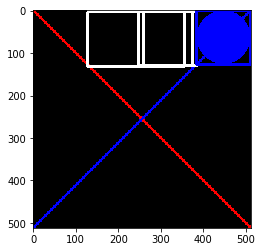

In [61]:
# Put a circle
img = cv2.circle(image_boxed,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
plt.imshow(img)

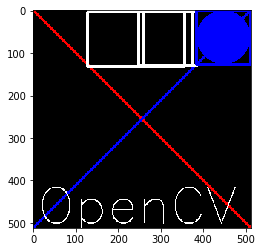

In [62]:
# Put atext
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

In [63]:
# save an image
cv2.imwrite('data/final_image.png',img)

True

- Basic Image operation with in-built library

  - Open Image file and display it

  - Create Image

      - draw a line, box,  circle ...

  - Save Image to a file

- Install OpenCV

  - Open Image file and display it

  - Create Image
      - draw a line, box,  circle ...


  - Save Image to a file

  - Image (raw) Binary vs Image Array (numpy)
    - convert Binary to Array
    - convert Array to Binary
    - save a numpy array as csv
    - save a numpy array as npy

  - Color Channels: RGB vs BGR

    - No way to differentiate just know it
      - https://stackoverflow.com/q/30802493/9319493
      - https://stackoverflow.com/q/46898979/9319493
      - https://note.nkmk.me/en/python-opencv-bgr-rgb-cvtcolor/
      - https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/
      - https://lifearoundkaur.wordpress.com/2015/08/04/difference-between-rgb-and-bgr/
      - https://medium.com/@kharikri/image-processing-tips-for-computer-vision-and-deep-learning-tasks-e5247ec94f3
      - https://www.codementor.io/@innat_2k14/image-data-analysis-using-numpy-opencv-part-1-kfadbafx6
      - https://answers.opencv.org/question/31437/rgb-vs-bgr/
      - https://codewords.recurse.com/issues/six/image-processing-101
    
    - Open in RGB and BGR
    - Convert from one to another
    - Grayscale
      - https://www.researchgate.net/post/why_gray_level_image_are_the_most_preferred_image_format

- cv2.waitKey()

# Advanced OpenCV

- OpenCV video capture
- Convert video to images (frames)
- create 2 functions
  1. Captures video and saves it to the given filename
  2. Takes a video file and converts it to images with snapshopts taken after a given time. Have option to save as raw binary or as npy(default)
- Face Detection VS Face Recognition
  - Basic Object detection with pattern recognition
  - Good or Bad ?!
  - Single and Multiple occurence
- Face Detection using OpenCV and Haar Cascade Classifier
  - with single images : test 4 different images
  - test with images gotten from video
  - test with live stream (earlier function will need to be adjusted - "don't save images")
- K-nearest algorithms for supervised learning on Images: to  build a classifier
- Putting it all together- recoginsing images
- Deep Learning for Face Recognition: Tensorflow2
- Deep Learning for Face Recognition: Caffe
- Deep Learning for Face Recognition: Pytorch
- Exercise: Recognise the Dean's image in the graduation ceremony pictures using KERAS (choose different base libraries)
  - Do research
  - Ask questions
  - Help each other
  - Work in the open
  - THIS IS SOMETHING YOU CAN PUT IN YOUR CV
  - https://project.inria.fr/deeplearning/files/2016/05/DLFrameworks.pdf
  